In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Chuẩn bị dữ liệu

In [3]:
athletes = pd.read_csv('data/athletes.csv', index_col=0)
athletes.head()

,name,nationality,sex,date_of_birth,height,weight,sport,gold,silver,bronze,total,year,age
0,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0,0,1969,47
1,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,0,1986,30
2,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,1,1992,24
3,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0,0,1991,25
4,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0,0,1990,26


In [9]:
df_3_country = athletes[athletes['nationality'].isin(['USA','CHN','RUS'])]
df_3_country.head()

,name,nationality,sex,date_of_birth,height,weight,sport,gold,silver,bronze,total,year,age
6,Aaron Russell,USA,male,1993-06-04,2.05,98.0,volleyball,0,0,1,1,1993,23
13,Abbey D'Agostino,USA,female,1992-05-25,1.61,49.0,athletics,0,0,0,0,1992,24
14,Abbey Weitzeil,USA,female,1996-12-03,1.78,68.0,aquatics,1,1,0,2,1996,20
60,Abdulrashid Sadulaev,RUS,male,1996-05-09,1.77,86.0,wrestling,1,0,0,1,1996,20
64,Abigail Johnston,USA,female,1989-11-16,1.66,61.0,aquatics,0,0,0,0,1989,27


In [6]:
# Tạo dữ liệu crosstab chứa thông tin 10 quốc gia có số huy chương vàng nhiều nhất
ser = athletes.groupby('nationality')['gold'].sum().sort_values(ascending=False).head(10)
df_top10 = athletes[athletes['nationality'].isin(ser.index)]
df_10_gold = pd.crosstab(df_top10['sport'], df_top10['nationality'], values=df_top10['gold'], aggfunc=sum)
df_10_gold.head()

nationality,ARG,AUS,BRA,CHN,FRA,GBR,GER,JPN,RUS,USA
sport,,,,,,,,,,
aquatics,0.0,7.0,0.0,11.0,0.0,3.0,0.0,2.0,11.0,61.0
archery,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
athletics,0.0,0.0,1.0,2.0,0.0,2.0,2.0,0.0,0.0,27.0
badminton,NaN,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0
basketball,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,24.0


In [13]:
# 10 quốc gia có số huy chương nhiều nhất
ser = athletes.groupby('nationality')['total'].sum().sort_values(ascending=False).head(10)
df_top10_medal = athletes[athletes['nationality'].isin(ser.index)]
df_top10_medal = df_top10.groupby('nationality')['gold','silver','bronze'].sum().sort_values(by='gold', ascending=False)
df_top10_medal.head()

,gold,silver,bronze
nationality,,,
USA,139,54,71
GBR,64,55,26
RUS,52,29,34
GER,49,44,67
CHN,46,30,37


## Treemap

In [10]:
fig = px.treemap(df_3_country, path=[ 'sport', 'nationality'], values='total', 
                 title='Tình hình thi đấu Olympic giữa Mỹ-Trung Quốc-Nga')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=40, l=25, r=25, b=25))
fig.show()

## Heatmap

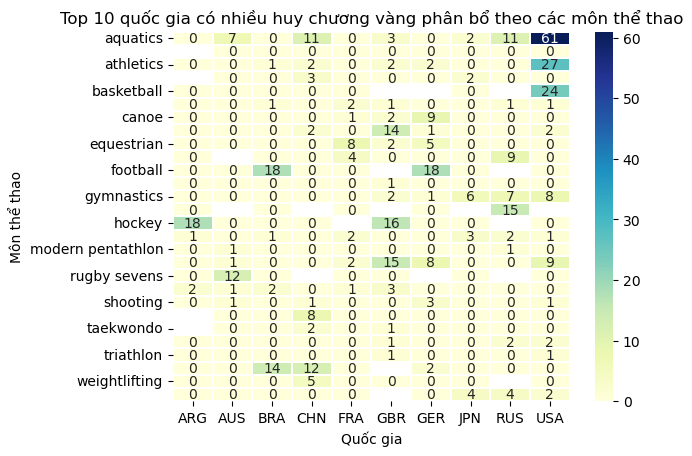

In [7]:
sns.heatmap(df_10_gold, cbar=True, cmap='YlGnBu', linewidths=0.3, annot=True, fmt='g')

plt.title('Top 10 quốc gia có nhiều huy chương vàng phân bổ theo các môn thể thao')
plt.xlabel('Quốc gia')
plt.ylabel('Môn thể thao')
plt.show()

In [14]:
fig = px.imshow(df_top10_medal, text_auto=True, aspect="auto",
                labels=dict(x="", y="Quốc gia"), 
                title='10 quốc gia có số huy chương nhiều nhất',
                color_continuous_scale=px.colors.sequential.YlGnBu)
fig.update_xaxes(side="top")
fig.show()